# Deep Learning Course

## Assignment 3

### Assignment Goals:

* Implementing and improving RNN based language models.
* Implementing and applying a Recurrent Neural Network on text classification problem.


In this assignment, you will implement RNN-based language models and compare extracted word representation from different models. You will also compare two different training methods for sequential data: Truncated Backpropagation Through Time __(TBTT)__ and Backpropagation Through Time __(BTT)__.
Also, you will be asked to apply Vanilla RNN to capture word representations and solve a text classification problem.


### DataSets

You will use two datasets, an English Literature dataset for language model task (part 1 to 4) and the 20Newsgroups dataset for text classification (part 5).

### Requirements

1. **(30 points) Implement a RNN based language model.**

    Implement the RNN based language model described by [Mikolov et al.](https://www.fit.vutbr.cz/research/groups/speech/publi/2010/mikolov_interspeech2010_IS100722.pdf), also called **Elman network**. The Elman network contains input, hidden and output layer and is trained by standard backpropagation (TBTT with $τ = 1$) using the cross-entropy loss.

      * The input vector $x(t)$ at time $t$ consists of the current word while using 1-of-N coding (thus its size is equal to the size of the vocabulary) $w(t)$ and a vector $s(t − 1)$ which represents output values in the hidden layer from the previous time step $t-1$.
      $$x(t) = w(t) + s(t-1)$$
      
      * The hidden layer is a fully connected tanh layer with size 500.
      $$s_j(t) = f(\sum_i x_i(t)u_{ji} )$$
      Here $u$ is the parameter matrix of hidden layer, $f$ is the tanh activation function.
      
      * The softmax output layer captures a valid probability distribution.
      $$y_k(t) = g(\sum_j s_j(t)v_{kj})$$
      Here $v$ is the parameter matrix of output layer, $g$ is the softmax function.
      
      * The model is trained with truncated backpropagation through time (TBTT) with $τ = 1$: the weights of the network are updated based on the error vector computed only for the current time step.
      
   Train the language model on the given English Literature dataset, report the model cross-entropy loss on the train set. Visualize the cross-entropy loss during training using a curve line. Your curve line should demonstrate that the loss value converges.
   
   Use nltk.word_tokenize to tokenize the documents. For initialization, $s(0)$ can be set to a vector of small values. Note that we are not interested in the *dynamic model* mentioned in the original paper.


2. **(20 points) Train the Elman network with BTT.**

    TBTT has less computational cost and memory needs in comparison with **backpropagation through time algorithm (BTT)**. These benefits come at the cost of losing long term dependencies ([reference](https://arxiv.org/abs/1705.08209)). TBTT is rarely used until now, we use BTT instead.

    Train your implemented Elman network with BTT, then compare the computational costs and performance of BTT and TBTT training.  For training the Elman-type RNN with BTT, one option is to perform mini-batch gradient descent with exactly one sentence per mini-batch. (Hints: The input  size will be (1, Sentence Length) ).

   * Split the document into sentences (you can use nltk.tokenize.sent_tokenize. The natural language toolkit (nltk) can be installed using the command 'pip install nltk').
   * For each sentence, perform one pass that computes the mean/sum loss for this sentence; then perform a gradient update for the whole sentence. (So the mini-batch size varies for the sentences with different lengths). You can truncate long sentences to fit the data in memory.
   * Report the model cross-entropy loss.Visualize the cross-entropy loss during training using a curve line. Your curve line should demonstrate that the loss value converges.

3. **(30 points) Improve your Elman network with GRU.**

    (a) Gated Recurrent Unit: It does not seem that simple recurrent neural networks can capture truly exploit context information with long dependencies, because of the problem of gradient vanishing and exploding. To solve this problem, gating mechanisms for recurrent neural networks were introduced. (15 points)

    Try to learn your last model (Elman + BTT) with the SimpleRnn unit replaced with a **Gated Recurrent Unit (GRU)**. Report the model cross-entropy loss.  Visualize the cross-entropy loss during training using a curve line. Your curve line should demonstrate that the loss value converges. Compare your results in terms of cross-entropy loss with two other approaches (part 1 and 2).

    (b) Text generation: Use each model to generate 10 synthetic sentences of 15 words each. Discuss the quality of the sentences generated - do they look like proper English? Do they match the training set? (15 points)
    
    Text generation from a given language model can be done using the following iterative process:
   - Set sequence = \[first_word\], chosen randomly.
   - Select a new word based on the sequence so far, add this word to the sequence, and repeat. At each iteration, select the word with maximum probability given the sequence so far. The trained language model outputs this probability.

4. **(20 points) Implement a text classification model.**

    We are aiming to learn an RNN model that predicts document categories given its content (text classification). For this task, we will use the 20Newsgroups dataset. The 20Newsgroupst contains messages from twenty newsgroups.  We selected four major categories (comp, politics, rec, and religion) comprising around 13k documents altogether. Your model should learn word representations to support the classification task. For solving this problem modify the **Elman network** architecture and simple RNN such that the last layer is a softmax layer with just 4 output neurons (one for each category).

    * Download the 20Newsgroups dataset, and use the below helper function data_loader() to read in the dataset.
    * Split the data into a training set (90%) and validation set (10%).
    * Implement your text classification model, and train the model on 20Newsgroups training set.
    * Report your accuracy results on the validation set. Try to achieve $\geq 80\%$ validation accuracy. (5 points)

### Submission Notes

Please use Jupyter Notebook. The notebook should include the final code, results and your answers. You should submit your Notebook in (.pdf or .html) and .ipynb format. (penalty 10 points)

To reduce the parameters, you can merge all words that occur less often than a threshold into a special rare token (\__unk__).

**Instructions：**

The university policy on academic dishonesty and plagiarism (cheating) will be taken very seriously in this course. Everything submitted should be your own writing or coding. You must not let other students copy your work. Spelling and grammar count.

Your assignments will be marked based on correctness, originality (the implementations and ideas are from yourself), and test performance.



## Your Implementation

In [1]:
import numpy as np
import torch
from torch import nn
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import torch.nn.functional as F
import torch.optim as optim
nltk.download('punkt')
from collections import Counter
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import sent_tokenize
device = 'cuda' if torch.cuda.is_available() else 'cpu'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### 1. Implement a RNN based language model

In [ ]:
!unzip data.zip

 20%|██        | 1/5 [00:58<03:52, 58.16s/it]

Epoch 0 Loss: 6.312484109164903


 40%|████      | 2/5 [01:55<02:53, 57.94s/it]

Epoch 1 Loss: 5.7717783858136436


 60%|██████    | 3/5 [02:44<01:47, 53.75s/it]

Epoch 2 Loss: 5.488251331270955


 80%|████████  | 4/5 [03:31<00:51, 51.15s/it]

Epoch 3 Loss: 5.331547078038389


100%|██████████| 5/5 [04:18<00:00, 51.79s/it]

Epoch 4 Loss: 5.229494723904693


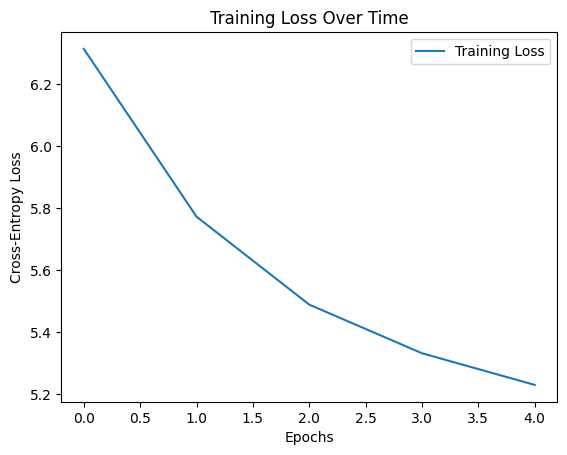

In [3]:
import tqdm

# device = 'cuda' if torch.cuda.is_available() else 'cpu'
class data_set(Dataset):
  def __init__(self, data_path='./data/English Literature.txt'):
    with open(data_path, encoding="ISO-8859-1", mode='r')as f:
      self.data =f.read()
    self.el_tokens = word_tokenize(self.data.lower())
    self.vocabulary = set(self.el_tokens)
    self.word_index = {word: index for index, word in enumerate(self.vocabulary)}
    self.vacabulary_size = len(self.vocabulary)

  def __len__(self):
    return len(self.el_tokens)-1

  def one_hot(self, word):
    one_hot_vector = torch.zeros(self.vacabulary_size)
    one_hot_vector[self.word_index[word]] = 1
    return one_hot_vector

  def __getitem__(self, index):
    return (self.one_hot(self.el_tokens[index]),self.one_hot(self.el_tokens[index+1]))
batch_size = 32
hidden_size = 500
dataset = data_set()
dataloader = DataLoader(dataset, batch_size, shuffle=True)

input_size = len(dataset.vocabulary)
output_size = len(dataset.vocabulary)
epochs=5


class ElmanRNN(nn.Module):
  def __init__(self, vocab_size, hidden_size, output_size, batch_size):
    super(ElmanRNN, self).__init__()
    self.batch_size = batch_size
    self.hidden_size = hidden_size
    #self.embed = nn.Embedding(vocab_size, hidden_size)
    self.rnn = nn.RNN(vocab_size, hidden_size, batch_first=True)
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self, x, h0):
    out, hidden = self.rnn(x,h0)
    out = self.fc(out)
    return out, hidden
  def initHidden(self):
    return torch.zeros(1, self.hidden_size)




model1 = ElmanRNN(input_size, hidden_size, output_size, batch_size).to(device)
criterion=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.0001)
loss_values=[]

for epoch in tqdm.tqdm(range(epochs)):
  total_loss = 0
  h0 = model1.initHidden().to(device)
  for step, (x,y) in (enumerate(dataloader)):
    x = x.to(device)
    y = y.to(device)
    optimizer.zero_grad()
    output,hidden = model1(x,h0)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
  avg_loss = total_loss/len(dataloader)
  print(f"Epoch {epoch} Loss: {avg_loss}")
  loss_values.append(avg_loss)

plt.plot(loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()



### 2. Train the Elman network with BTT

Epoch 1, Loss: 4.6710
Epoch 2, Loss: 2.5827
Epoch 3, Loss: 1.9118
Epoch 4, Loss: 1.5554
Epoch 5, Loss: 1.3221


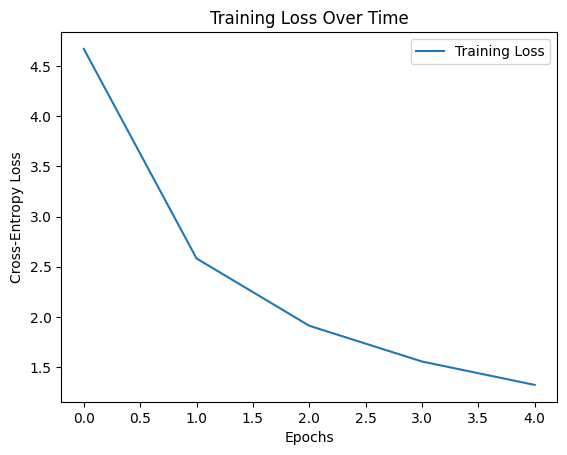

In [34]:

class SequenceDataset(Dataset):
    def __init__(self, data_path,truncate_length):
      with open(data_path, encoding="ISO-8859-1", mode='r') as file:
          self.data = file.read().lower()
      self.sentences = sent_tokenize(self.data.lower())
      self.sentence_tokenize = [word_tokenize(sentence) for sentence in self.sentences]
      self.el_tokens = word_tokenize(self.data.lower())
      self.vocabulary = set(self.el_tokens)
      self.word_index = {word: index for index, word in enumerate(self.vocabulary)}
      self.vacabulary_size = len(self.vocabulary)
      self.tokenize_truncate = []
      for sentence in self.sentence_tokenize:
        if len(sentence) > truncate_length:
          self.tokenize_truncate.append(sentence[:truncate_length])
        else:
          self.tokenize_truncate.append(sentence)



    def __len__(self):
        return len(self.tokenize_truncate)

    def one_hot_encode(self, idx):
        one_hot =[0] * self.vacabulary_size
        one_hot[idx] = 1
        return one_hot

    def one_hot_sentence(self, sentence):
        # words = word_tokenize(sentence)
        one_hot_sentence = [self.one_hot_encode(self.word_index[word]) for word in sentence]
        return one_hot_sentence

    def __getitem__(self, idx):
        sentence = self.tokenize_truncate[idx]
        return torch.tensor(self.one_hot_sentence(sentence), dtype=torch.float32)


hidden_size = 500
truncate_length=25
batch_size = 1
data_path='./data/English Literature.txt'
dataset2 = SequenceDataset(data_path, truncate_length)
dataloader2 = DataLoader(dataset2, batch_size=batch_size, shuffle=True)
learning_rate = 0.00005
vocab_size =12443


class ElmanRNNBTT(nn.Module):
  def __init__(self, vocab_size, hidden_size, output_size, batch_size):
    super(ElmanRNNBTT, self).__init__()
    self.batch_size = batch_size
    self.hidden_size = hidden_size
    #self.embed = nn.Embedding(vocab_size, hidden_size)
    self.rnn = nn.RNN(vocab_size, hidden_size, batch_first=True)
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self, x, h0):
    out, hidden = self.rnn(x,h0)
    out = self.fc(out)
    return out, hidden
  def initHidden(self):
    return torch.zeros(self.batch_size, self.hidden_size)




model2 = ElmanRNNBTT(vocab_size, hidden_size, vocab_size, batch_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=learning_rate)
epochs = 5
loss_values=[]

# Training Loop
for epoch in range(epochs):
    total_loss = 0
    hidden = model2.initHidden().to(device)
    for step, sentence in (enumerate(dataloader2)):
        sentence = sentence.to(device)
        target = sentence.clone()
        loss=0
        for i in range(sentence.size(1)):
         output, hidden = model2(sentence[:, i,:], hidden.detach())
         loss += criterion(output, target[:, i,:])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()/sentence.size(1)
    avg_loss = total_loss/len(dataloader2)
    loss_values.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}')

plt.plot(loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()

### 3. Improve your Elman network with GRU

Epoch 1, Loss: 4.4729
Epoch 2, Loss: 4.8641
Epoch 3, Loss: 1.8903
Epoch 4, Loss: 1.4396
Epoch 5, Loss: 1.1929


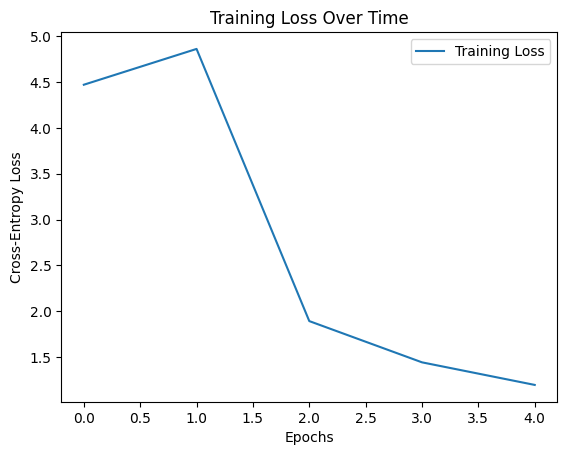

In [36]:

class GRUDataset(Dataset):
    def __init__(self, data_path,truncate_length):
      with open(data_path, encoding="ISO-8859-1", mode='r') as file:
          self.data = file.read().lower()
      self.sentences = sent_tokenize(self.data.lower())
      self.sentence_tokenize = [word_tokenize(sentence) for sentence in self.sentences]
      self.el_tokens = word_tokenize(self.data.lower())
      self.vocabulary = set(self.el_tokens)
      self.word_index = {word: index for index, word in enumerate(self.vocabulary)}
      self.vacabulary_size = len(self.vocabulary)
      self.tokenize_truncate = []
      for sentence in self.sentence_tokenize:
        if len(sentence) > truncate_length:
          self.tokenize_truncate.append(sentence[:truncate_length])
        else:
          self.tokenize_truncate.append(sentence)



    def __len__(self):
        return len(self.tokenize_truncate)

    def one_hot_encode(self, idx):
        one_hot =[0] * self.vacabulary_size
        one_hot[idx] = 1
        return one_hot

    def one_hot_sentence(self, sentence):
        # words = word_tokenize(sentence)
        one_hot_sentence = [self.one_hot_encode(self.word_index[word]) for word in sentence]
        return one_hot_sentence

    def __getitem__(self, idx):
        sentence = self.tokenize_truncate[idx]
        return torch.tensor(self.one_hot_sentence(sentence), dtype=torch.float32)


hidden_size = 500
truncate_length=25
batch_size = 1
data_path='./data/English Literature.txt'
dataset3 = GRUDataset(data_path, truncate_length)
dataloader3 = DataLoader(dataset3, batch_size=batch_size, shuffle=True)
learning_rate = 0.00005
vocab_size =12443


class ElmanRNNGRU(nn.Module):
  def __init__(self, vocab_size, hidden_size, output_size, batch_size):
    super(ElmanRNNGRU, self).__init__()
    self.batch_size = batch_size
    self.hidden_size = hidden_size
    #self.embed = nn.Embedding(vocab_size, hidden_size)
    self.rnn = nn.GRU(vocab_size, hidden_size, batch_first=True)
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self, x, h0):
    out, hidden = self.rnn(x,h0)
    out = self.fc(out)
    return out, hidden
  def initHidden(self):
    return torch.zeros(self.batch_size, self.hidden_size)




model3 = ElmanRNNGRU(vocab_size, hidden_size, vocab_size, batch_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=learning_rate)
epochs = 5
loss_values=[]

# Training Loop
for epoch in range(epochs):
    total_loss = 0
    hidden = model3.initHidden().to(device)
    for step, sentence in (enumerate(dataloader3)):
        sentence = sentence.to(device)
        target = sentence.clone()
        loss=0
        for i in range(sentence.size(1)):
         output, hidden = model3(sentence[:, i,:], hidden.detach())
         loss += criterion(output, target[:, i,:])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()/sentence.size(1)
    avg_loss = total_loss/len(dataloader3)
    loss_values.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}')

plt.plot(loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()

In [6]:
# 3b

import random
import torch.nn.functional as F

data_path='./data/English Literature.txt'
with open(data_path, encoding="ISO-8859-1", mode='r')as f:
  data =f.read()
el_tokens = word_tokenize(data.lower())
vocabulary = set(el_tokens)
vocabulary = list(vocabulary)

num_sentences = 10
sentence_length = 15

def generate_one_hot(idx, vocab_size):
    return [1 if i == idx else 0 for i in range(vocab_size)]

def generate_words(model, start_idx, vocab, hidden_size, sentence_length):
    vocab_size = len(vocab)
    sentence_idxs = [start_idx]
    model.eval()
    model.to(device)
    hidden = torch.zeros(1, hidden_size).to(device)
    input_tensor = torch.tensor([generate_one_hot(start_idx, vocab_size)], dtype=torch.float32).to(device)

    with torch.no_grad():
        for _ in range(sentence_length - 1):
            output, hidden = model(input_tensor, hidden)
            next_idx = torch.argmax(F.softmax(output, dim=1)[-1]).item()
            sentence_idxs.append(next_idx)
            input_tensor = torch.tensor([generate_one_hot(next_idx, vocab_size)], dtype=torch.float32).to(device)

    return ' '.join(vocab[i] for i in sentence_idxs)

vocab_size = len(vocabulary)  # Assuming vocabulary is predefined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

sentence1, sentences2, sentences3= [], [],[]

for _ in range(num_sentences):
    start_idx = random.randint(0, vocab_size - 1)
    sentence1.append(generate_words(model1, start_idx, vocabulary, hidden_size, sentence_length))
    sentences2.append(generate_words(model2, start_idx, vocabulary, hidden_size, sentence_length))
    sentences3.append(generate_words(model3, start_idx, vocabulary, hidden_size, sentence_length))

print("First model")
for sentence in sentence1:
    print(sentence)
print("Second model")
for sentence in sentences2:
    print(sentence)
print("Third model")
for sentence in sentences3:
    print(sentence)


First model
fire , and i am a man , and i am a man , and
interpreters , and i am a man , and i am a man , and
helping , and i am a man , and i am a man , and
immoderate , and i am a man , and i am a man , and
folds-in , and i am a man , and i am a man , and
welcome , and i am a man , and i am a man , and
across , and i am a man , and i am a man , and
titles , and i am a man , and i am a man , and
forbidden , and i am a man , and i am a man , and
extol , and i am a man , and i am a man , and
Second model
fire fire fire fire fire fire fire fire fire fire fire fire fire fire fire
interpreters into into into into into into into into into into into into into into
helping years years years years years years years years years years years years years years
immoderate into into into into into into into into into into into into into into
folds-in years years years years years years years years years years years years years years
welcome welcome welcome welcome welcome welcome welcome welcome wel

### 4. Implement a text classification model

In [7]:
"""This code is used to read all news and their labels"""
import os
import glob

def to_categories(name, cat=["politics","rec","comp","religion"]):
    for i in range(len(cat)):
        if str.find(name,cat[i])>-1:
            return(i)
    print("Unexpected folder: " + name) # print the folder name which does not include expected categories
    return("wth")

def data_loader(images_dir):
    categories = os.listdir(data_path)
    news = [] # news content
    groups = [] # category which it belong to

    for cat in categories:
        print("Category:"+cat)
        for the_new_path in glob.glob(data_path + '/' + cat + '/*'):
            news.append(open(the_new_path,encoding = "ISO-8859-1", mode ='r').read())
            groups.append(cat)

    return news, list(map(to_categories, groups))



data_path = "data/20news_subsampled"
news, groups = data_loader(data_path)

Category:comp.windows.x
Category:talk.politics.guns
Category:talk.politics.mideast
Category:comp.graphics
Category:rec.sport.hockey
Category:talk.politics.misc
Category:comp.sys.ibm.pc.hardware
Category:soc.religion.christian
Category:rec.motorcycles
Category:rec.sport.baseball
Category:comp.os.ms-windows.misc
Category:comp.sys.mac.hardware
Category:rec.autos
Category:talk.religion.misc


In [8]:
print(len(news[0]))
print(type(groups))

1096
<class 'list'>


In [43]:
from torch.utils.data import random_split



class data_set4(Dataset):
    def __init__(self, news, groups):
        self.news = news
        self.groups = groups
        self.vocab=[]
        self.file=[]
        for new in self.news:
          self.file.append(word_tokenize(new))
          self.vocab+=word_tokenize(new)
        self.vocab=set(self.vocab)

        self.vocab_size = len(self.vocab)
        self.word_index = {word: idx for idx, word in enumerate(self.vocab)}


    def __len__(self):
        return len(self.news)

    def one_hot_encode(self, idx):
        one_hot = torch.zeros(self.vocab_size)
        one_hot[idx] = 1
        return one_hot

    def one_hot_file(self, file):
        # words = word_tokenize(sentence)
        one_hot_file = [self.one_hot_encode(self.word_index[word]) for word in file]
        return one_hot_file


    def __getitem__(self, idx):
        file = self.file[idx]
        category = self.groups[idx]
        target = torch.zeros(4)
        target[category] = 1
        return self.one_hot_file(file), target


data_set4 = data_set4(news, groups)

total_size=len(data_set4)
train_size=int(total_size*0.9)
val_size=total_size-train_size
train_set, val_set = random_split(data_set4, [train_size, val_size])
data_loader4_train = DataLoader(train_set, shuffle=True)
data_loader4_val = DataLoader(val_set, shuffle=True)


class TextRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TextRNN, self).__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out)
        return out


input_dim = len(data_set4.vocab)
hidden_dim = 500
output_dim = 4
model = TextRNN(input_dim, hidden_dim, output_dim)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10
losses = []



In [51]:
for epoch in range(epochs):
  total_loss = 0
  for new, target in (data_loader4_train):
      hidden = torch.zeros(1, hidden_size).to(device)
      output= model(torch.stack(new))
      output = output[:, -1, :].squeeze(1)
      from pdb import set_trace
      set_trace()
      loss = criterion(output.unsqueeze(0), torch.tensor(target))
      optimizer.zero_grad()  # Clear previous gradients
      loss.backward()
      optimizer.step()

      total_loss += loss.item()

  avg_loss = total_loss / len(dataloader)
  losses.append(avg_loss)
  print(f"Epoch {epoch + 1}/{epochs}, training Loss: {avg_loss:.4f}")

model.eval()
total_loss = 0
with torch.no_grad():
    for batch in data_loader4_val:
        inputs, labels = batch
        outputs = model(torch.stack(inputs).unsqueeze(0))
        loss = criterion(outputs[:, -1, :], labels.long())
        total_loss += loss.item()
avg_loss = total_loss / len(data_loader4_val)
print(f"Validation Loss: {avg_loss:.4f}")


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/bdb.py", line 336, in set_trace
    sys.settrace(self.trace_dispatch)



> <ipython-input-51-0930d2f18734>(9)<cell line: 1>()
      7       from pdb import set_trace
      8       set_trace()
----> 9       loss = criterion(output.unsqueeze(0), torch.tensor(target))
     10       optimizer.zero_grad()  # Clear previous gradients
     11       loss.backward()

ipdb> output.shape
torch.Size([168, 4])
ipdb> type(output), type(target)
(<class 'torch.Tensor'>, <class 'torch.Tensor'>)
ipdb> output
tensor([[ 1.3995e-03,  4.8282e-02,  2.4674e-03,  2.7331e-02],
        [-6.0918e-03,  1.0472e-02,  2.2223e-02, -1.2876e-02],
        [-7.7186e-03,  3.5809e-02,  1.0677e-02,  2.1045e-02],
        [ 3.1221e-03,  1.2763e-02,  2.7101e-02,  1.3331e-02],
        [ 6.5018e-03,  4.4071e-02,  2.8229e-02,  7.2724e-03],
        [-1.3070e-02,  4.3770e-02,  2.3662e-02,  5.6891e-05],
        [ 1.9992e-03,  3.2892e-02,  4.1409e-02,  4.8678e-03],
        [-3.7402e-04,  2.2599e-02, -3.7093e-03,  8.9260e-03],
        [ 1.7747e-02,  3.3875e-02,  1.4903e-02,  1.1383e-02],
        [-5.0961e-0


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/bdb.py", line 361, in set_quit
    sys.settrace(None)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/debugger.py", line 1075, in cmdloop
    sys.settrace(None)



--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


<ipython-input-51-0930d2f18734>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(output.unsqueeze(0), torch.tensor(target))


RuntimeError: expected scalar type Long but found Float